In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from ROI_extraction import preprocess_image
import sys
sys.path.append("..")
from common_functions import HSV_features_generation

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_text
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

def eval_random_forest(X,y,n_estimators,max_depth):
    # Initialize a list to store the accuracy scores
    accuracy_scores = []
    val_accuracy_scores = []
    features_weights = []
    confusion_matrixs = []
    val_confusion_matrixs = []
    
    # Nombre de plis pour la validation croisée k-fold
    k = 4

    # Créer une instance de StratifiedKFold avec k plis
    skf = StratifiedKFold(n_splits=k)

    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        print(f"Fold {i}:")
        # Diviser les données d'entraînement et de validation pour ce pli
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]

        y_train, y_val = y[train_index], y[test_index]

        # Création de l'arbre de décision
        decision_tree = RandomForestClassifier(random_state=0,n_estimators=n_estimators, max_depth=max_depth)
        
        # Entraînement de l'arbre de décision
        decision_tree.fit(X_train, y_train)

        # Prédiction sur les données de test
        y_train_pred = decision_tree.predict(X_train)
        y_val_pred = decision_tree.predict(X_val)


        # Calculate the accuracy score
        accuracy = metrics.accuracy_score(y_train, y_train_pred)
        val_accuracy = metrics.accuracy_score(y_val, y_val_pred)

        confusion_mat = confusion_matrix(y_train, y_train_pred)
        confusion_mat_val = confusion_matrix(y_val, y_val_pred)

        print(f'Fold {i} accuracy : {accuracy}, val accuracy :{val_accuracy}')

        # Append the accuracy score to the list
        accuracy_scores.append(accuracy)
        val_accuracy_scores.append(val_accuracy)
        features_weights.append(decision_tree.feature_importances_) 
        confusion_matrixs.append(confusion_mat)
        val_confusion_matrixs.append(confusion_mat_val)

        # Affichage des poids des caractéristiques
        print(f"Poids caractéristiques : {decision_tree.feature_importances_}")

    # Compute the average accuracy across all folds
    print('-------------------')
    print(f"Train accuracy : {np.mean(accuracy_scores)}")
    print(f"Val accuracy : {np.mean(val_accuracy_scores)}")
    features_weights = np.array(features_weights)
    average_weights = [features_weights[:,i].mean() for i in range(6)]
    print('Average feature weights',average_weights)

    # Filtrer les poids et les noms des features pour exclure les valeurs nulles
    filtered_weights = [w for w in average_weights if w != 0]
    filtered_feature_names = [name for name, w in zip(['H_mean','H_std','S_mean','S_std','V_mean','V_std'], average_weights) if w != 0]

    plt.pie(filtered_weights, labels=filtered_feature_names, autopct='%1.1f%%')
    plt.show()

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Vraie étiquette')
    ax.set_title('Matrice de confusion')
    print('Average confusion matrix')
    sns.heatmap(np.mean(confusion_matrixs, axis=0), annot=True, cmap="Blues", ax=ax, fmt='.0f')
    plt.show()

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Vraie étiquette')
    ax.set_title('Matrice de confusion val')
    print('Average val confusion matrix')
    sns.heatmap(np.mean(val_confusion_matrixs, axis=0), annot=True, cmap="Blues", ax=ax, fmt='.0f')
    plt.show()

    return np.mean(accuracy_scores),np.mean(val_accuracy_scores),np.array(average_weights)



In [3]:
#raw
X,y = HSV_features_generation('../images/raw_pollub/')


Fold 0:
Fold 0 accuracy : 0.6667553899387809, val accuracy :0.6664006384676776
Poids caractéristiques : [0.18 0.26 0.28 0.02 0.2  0.06]
Fold 1:
Fold 1 accuracy : 0.6667553899387809, val accuracy :0.6664006384676776
Poids caractéristiques : [0.12 0.2  0.2  0.22 0.2  0.06]
Fold 2:
Fold 2 accuracy : 0.6665779670037254, val accuracy :0.6669329073482428
Poids caractéristiques : [0.16 0.22 0.22 0.12 0.2  0.08]
Fold 3:
Fold 3 accuracy : 0.6665779670037254, val accuracy :0.6669329073482428
Poids caractéristiques : [0.16 0.26 0.26 0.04 0.2  0.08]
-------------------
Train accuracy : 0.6666666784712532
Val accuracy : 0.6666667729079603
Average feature weights [0.155, 0.235, 0.24, 0.09999999999999999, 0.2, 0.07]


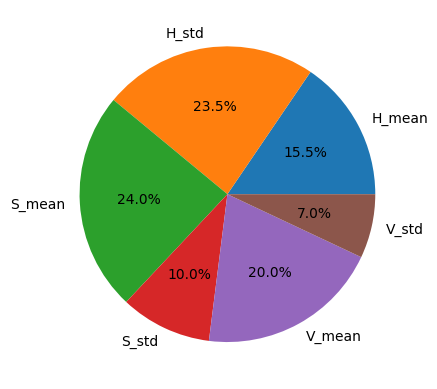

Average confusion matrix


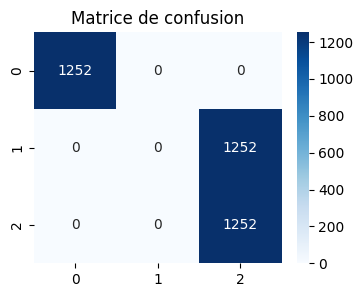

Average val confusion matrix


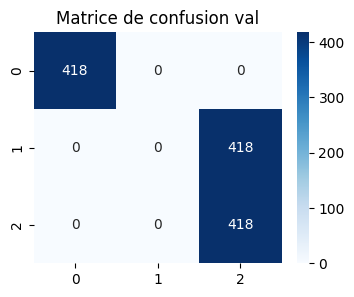

Fold 0:
Fold 0 accuracy : 0.9084375831780676, val accuracy :0.8802873104549083
Poids caractéristiques : [0.18500116 0.26448029 0.21574152 0.08182285 0.18531311 0.06764107]
Fold 1:
Fold 1 accuracy : 0.8796912430130424, val accuracy :0.8707102952913008
Poids caractéristiques : [0.13815101 0.21470928 0.155359   0.23297544 0.17656616 0.0822391 ]
Fold 2:
Fold 2 accuracy : 0.8866418307610431, val accuracy :0.8154952076677316
Poids caractéristiques : [0.1287559  0.21081867 0.16167279 0.16547242 0.20507373 0.1282065 ]
Fold 3:
Fold 3 accuracy : 0.8815859499733901, val accuracy :0.8154952076677316
Poids caractéristiques : [0.14880327 0.26254866 0.19218456 0.10562991 0.19988992 0.09094366]
-------------------
Train accuracy : 0.8890891517313857
Val accuracy : 0.8454970052704182
Average feature weights [0.15017783430006046, 0.23813922677873317, 0.1812394694473285, 0.14647515476352413, 0.1917107314750697, 0.09225758323528403]


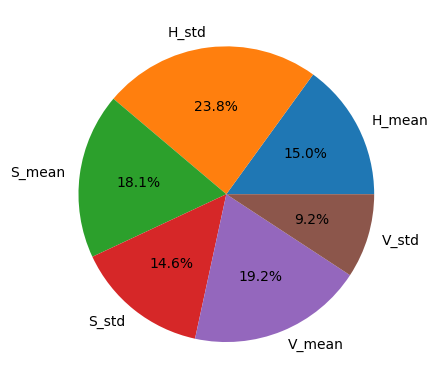

Average confusion matrix


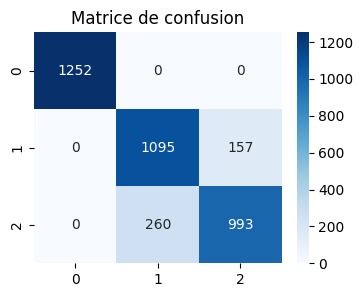

Average val confusion matrix


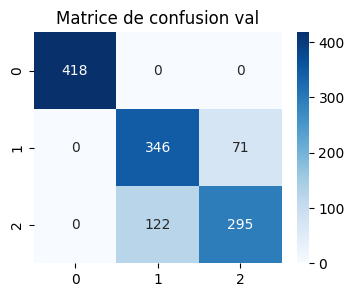

Fold 0:
Fold 0 accuracy : 0.9270694703220654, val accuracy :0.8691141260973663
Poids caractéristiques : [0.19490862 0.26432584 0.19217229 0.1061519  0.17029741 0.07214394]
Fold 1:
Fold 1 accuracy : 0.91243013042321, val accuracy :0.9193934557063048
Poids caractéristiques : [0.15599666 0.21901544 0.13720962 0.23626741 0.16544371 0.08606715]
Fold 2:
Fold 2 accuracy : 0.9183076104310803, val accuracy :0.8961661341853036
Poids caractéristiques : [0.15233724 0.21485492 0.14652766 0.17058479 0.1892787  0.1264167 ]
Fold 3:
Fold 3 accuracy : 0.9089941458222459, val accuracy :0.8730031948881789
Poids caractéristiques : [0.16796047 0.25660021 0.17574898 0.11861077 0.19048901 0.09059056]
-------------------
Train accuracy : 0.9167003392496504
Val accuracy : 0.8894192277192885
Average feature weights [0.1678007453857893, 0.23869910411566883, 0.16291463853544652, 0.15790371684205445, 0.1788772079124728, 0.09380458720856807]


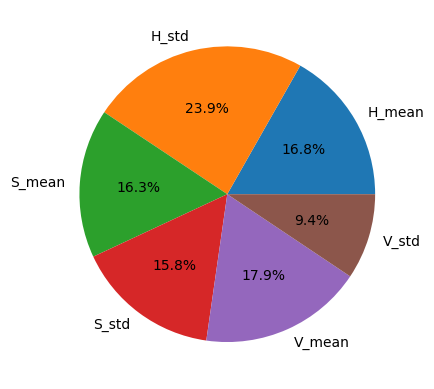

Average confusion matrix


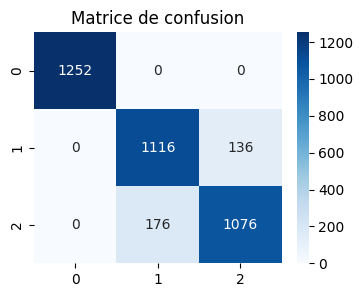

Average val confusion matrix


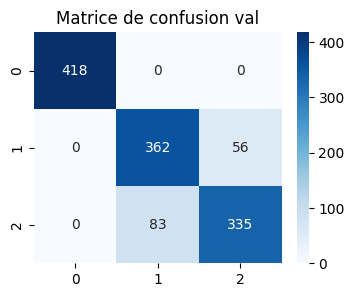

Fold 0:
Fold 0 accuracy : 0.9385147724248071, val accuracy :0.8866719872306464
Poids caractéristiques : [0.19772491 0.2513356  0.18450775 0.12391936 0.16856087 0.07395151]
Fold 1:
Fold 1 accuracy : 0.92467394197498, val accuracy :0.9201915403032721
Poids caractéristiques : [0.15992963 0.21606333 0.13702022 0.23266105 0.16073357 0.0935922 ]
Fold 2:
Fold 2 accuracy : 0.9350718467269824, val accuracy :0.9129392971246006
Poids caractéristiques : [0.15404159 0.20325847 0.14826267 0.18478806 0.18304354 0.12660568]
Fold 3:
Fold 3 accuracy : 0.9348057477381586, val accuracy :0.9065495207667732
Poids caractéristiques : [0.16642559 0.24699831 0.17235113 0.12778137 0.18618899 0.10025462]
-------------------
Train accuracy : 0.9332665772162321
Val accuracy : 0.9065880863563232
Average feature weights [0.16953042969866527, 0.22941392498650304, 0.16053544175518736, 0.16728745946787965, 0.17463174044672491, 0.09860100364503979]


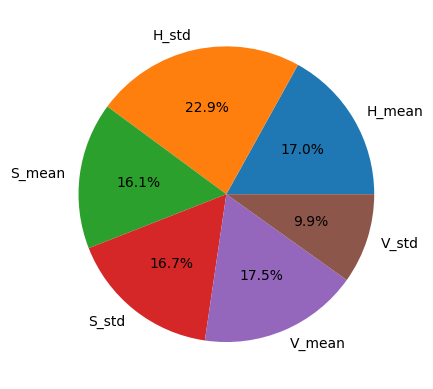

Average confusion matrix


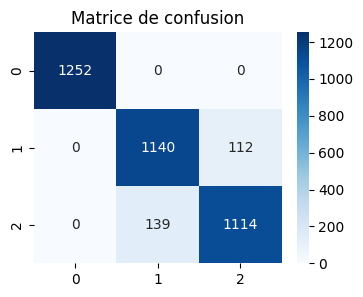

Average val confusion matrix


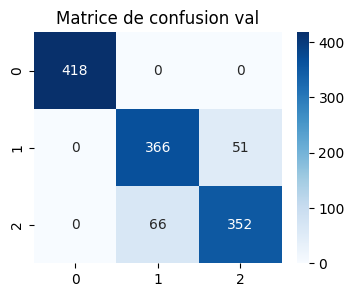

Fold 0:
Fold 0 accuracy : 0.9425073196699494, val accuracy :0.8866719872306464
Poids caractéristiques : [0.20033396 0.24372376 0.18522159 0.13005338 0.16678777 0.07387955]
Fold 1:
Fold 1 accuracy : 0.9382486026084642, val accuracy :0.9265762170790104
Poids caractéristiques : [0.16822583 0.20652068 0.14188605 0.23317778 0.15957234 0.09061733]
Fold 2:
Fold 2 accuracy : 0.9406599254922832, val accuracy :0.9193290734824281
Poids caractéristiques : [0.15655065 0.1996082  0.15126285 0.1856069  0.17925316 0.12771825]
Fold 3:
Fold 3 accuracy : 0.9422565194252261, val accuracy :0.90814696485623
Poids caractéristiques : [0.17209357 0.23822563 0.1738228  0.12880263 0.19067758 0.09637779]
-------------------
Train accuracy : 0.9409180917989808
Val accuracy : 0.9101810606620787
Average feature weights [0.1743010031929036, 0.22201956588435473, 0.16304832026805163, 0.1694101703952099, 0.1740727120690341, 0.09714822819044594]


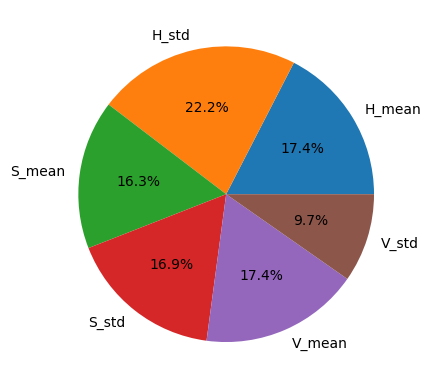

Average confusion matrix


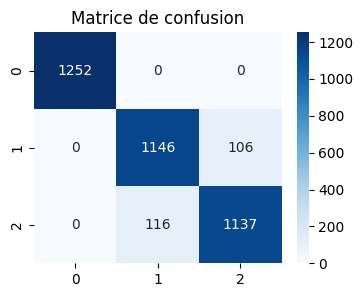

Average val confusion matrix


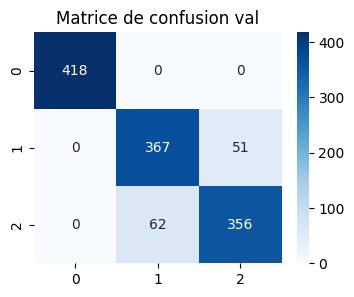

Fold 0:
Fold 0 accuracy : 0.9584775086505191, val accuracy :0.9162011173184358
Poids caractéristiques : [0.19715068 0.23557285 0.19137707 0.13326974 0.16790055 0.0747291 ]
Fold 1:
Fold 1 accuracy : 0.9542187915890338, val accuracy :0.9353551476456504
Poids caractéristiques : [0.16030088 0.20507764 0.14741309 0.23292438 0.1605461  0.09373792]
Fold 2:
Fold 2 accuracy : 0.9579563597658329, val accuracy :0.9305111821086262
Poids caractéristiques : [0.14870638 0.20107215 0.16299259 0.18068201 0.17465536 0.13189151]
Fold 3:
Fold 3 accuracy : 0.9590207557211282, val accuracy :0.9233226837060703
Poids caractéristiques : [0.1654561  0.23246591 0.17963198 0.13707532 0.18566249 0.09970819]
-------------------
Train accuracy : 0.9574183539316284
Val accuracy : 0.9263475326946956
Average feature weights [0.1679035083425271, 0.21854713752053273, 0.17035368453875752, 0.17098786429957397, 0.17219112628814923, 0.10001667901045953]


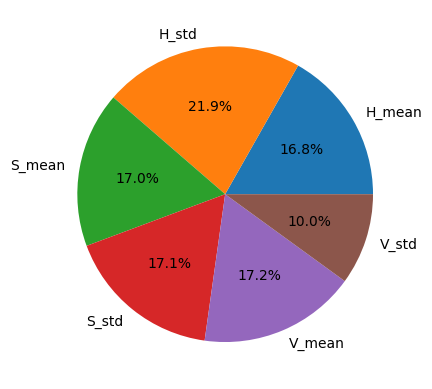

Average confusion matrix


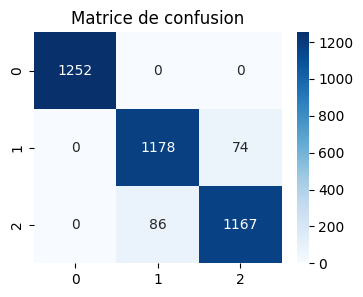

Average val confusion matrix


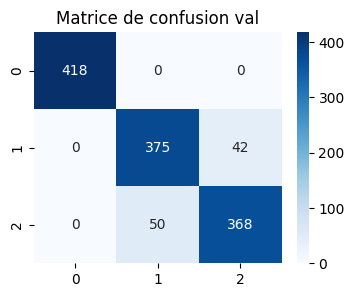

Fold 0:
Fold 0 accuracy : 0.6664892201224382, val accuracy :0.6671987230646449
Poids caractéristiques : [0.16 0.26 0.19 0.02 0.23 0.14]
Fold 1:
Fold 1 accuracy : 0.6664892201224382, val accuracy :0.6671987230646449
Poids caractéristiques : [0.12 0.21 0.15 0.18 0.22 0.12]
Fold 2:
Fold 2 accuracy : 0.6668440659925492, val accuracy :0.6661341853035144
Poids caractéristiques : [0.15 0.22 0.16 0.1  0.23 0.14]
Fold 3:
Fold 3 accuracy : 0.6668440659925492, val accuracy :0.6661341853035144
Poids caractéristiques : [0.15 0.26 0.18 0.03 0.23 0.15]
-------------------
Train accuracy : 0.6666666430574937
Val accuracy : 0.6666664541840797
Average feature weights [0.14500000000000002, 0.23750000000000002, 0.16999999999999998, 0.08250000000000002, 0.2275, 0.1375]


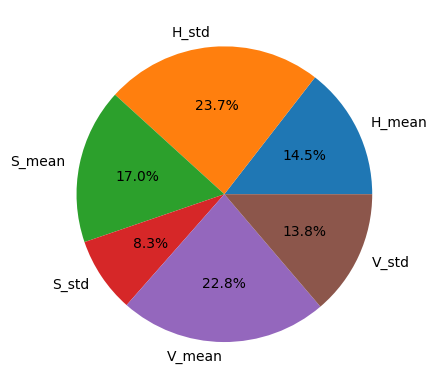

Average confusion matrix


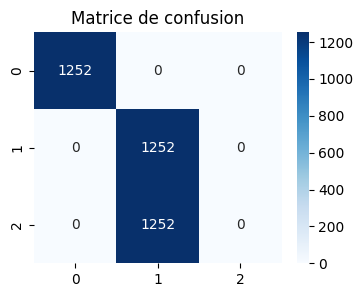

Average val confusion matrix


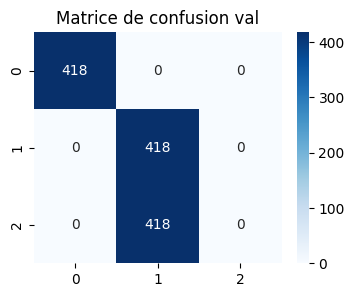

Fold 0:
Fold 0 accuracy : 0.9020495075858398, val accuracy :0.8802873104549083
Poids caractéristiques : [0.1680219  0.25261652 0.15145453 0.09015224 0.21313395 0.12462086]
Fold 1:
Fold 1 accuracy : 0.8799574128293851, val accuracy :0.8707102952913008
Poids caractéristiques : [0.13624658 0.20904291 0.11639854 0.21035382 0.19485966 0.1330985 ]
Fold 2:
Fold 2 accuracy : 0.8861096327833954, val accuracy :0.8170926517571885
Poids caractéristiques : [0.12048082 0.2066397  0.11811289 0.15903096 0.22876585 0.16696978]
Fold 3:
Fold 3 accuracy : 0.8810537519957424, val accuracy :0.8067092651757188
Poids caractéristiques : [0.13382599 0.25614553 0.13339339 0.10452312 0.23388626 0.1382257 ]
-------------------
Train accuracy : 0.8872925762985906
Val accuracy : 0.8436998806697791
Average feature weights [0.13964382146398516, 0.23111116752878258, 0.12983983650557396, 0.14101503439088933, 0.21766142915556824, 0.14072871095520076]


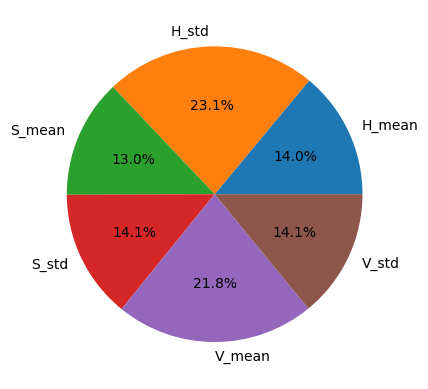

Average confusion matrix


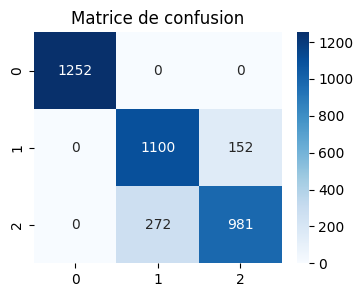

Average val confusion matrix


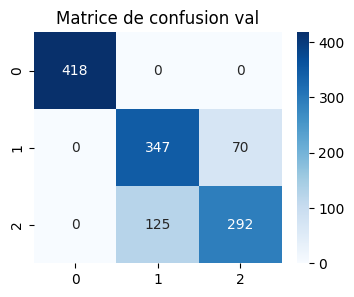

Fold 0:
Fold 0 accuracy : 0.9254724514240085, val accuracy :0.8723064644852354
Poids caractéristiques : [0.17508053 0.25534786 0.13714353 0.1139272  0.19799256 0.12050831]
Fold 1:
Fold 1 accuracy : 0.9142933191376098, val accuracy :0.9201915403032721
Poids caractéristiques : [0.15563923 0.22063562 0.10582083 0.21055259 0.17979949 0.12755225]
Fold 2:
Fold 2 accuracy : 0.9079297498669505, val accuracy :0.8777955271565495
Poids caractéristiques : [0.13878297 0.21499011 0.1075939  0.1648469  0.21314889 0.16063724]
Fold 3:
Fold 3 accuracy : 0.9201703033528472, val accuracy :0.8777955271565495
Poids caractéristiques : [0.14904084 0.25501048 0.12414018 0.11670417 0.21976202 0.13534231]
-------------------
Train accuracy : 0.9169664559453541
Val accuracy : 0.8870222647754016
Average feature weights [0.15463589199593616, 0.23649601659613023, 0.11867460972220456, 0.15150771523398038, 0.20267574027335028, 0.13601002617839836]


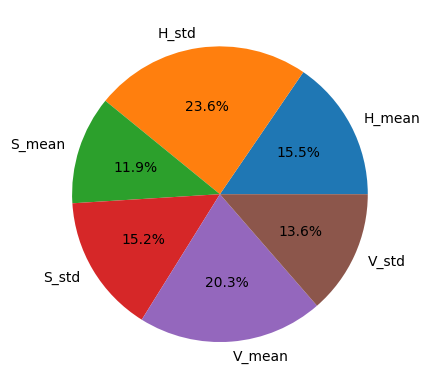

Average confusion matrix


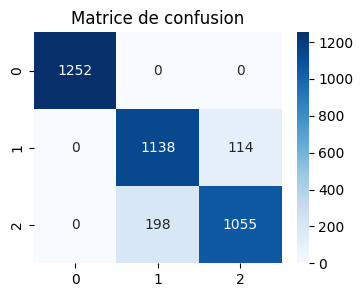

Average val confusion matrix


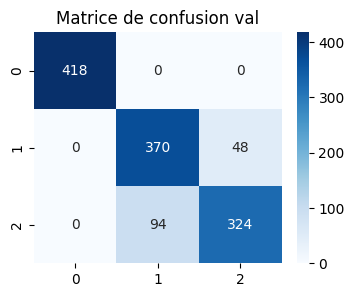

Fold 0:
Fold 0 accuracy : 0.9390471120574927, val accuracy :0.8858739026336792
Poids caractéristiques : [0.18338446 0.23898685 0.13354843 0.1341595  0.18944743 0.12047332]
Fold 1:
Fold 1 accuracy : 0.926270960873037, val accuracy :0.9257781324820431
Poids caractéristiques : [0.16226634 0.2135286  0.10741214 0.2138292  0.17308402 0.12987971]
Fold 2:
Fold 2 accuracy : 0.9350718467269824, val accuracy :0.9121405750798722
Poids caractéristiques : [0.14506045 0.20051728 0.11138974 0.18207516 0.2028051  0.15815227]
Fold 3:
Fold 3 accuracy : 0.9334752527940394, val accuracy :0.9049520766773163
Poids caractéristiques : [0.15632044 0.24090749 0.12426957 0.12875595 0.21081717 0.13892938]
-------------------
Train accuracy : 0.9334662931128879
Val accuracy : 0.9071861717182277
Average feature weights [0.16175792149004015, 0.22348505647486983, 0.11915497116360226, 0.1647049507445168, 0.19403843137475424, 0.13685866875221675]


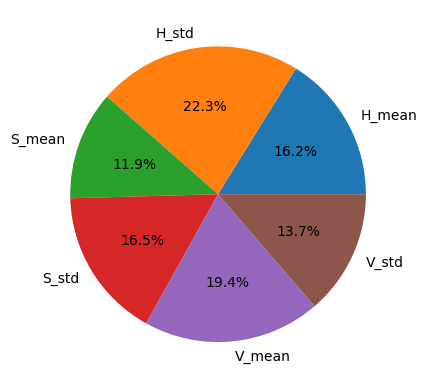

Average confusion matrix


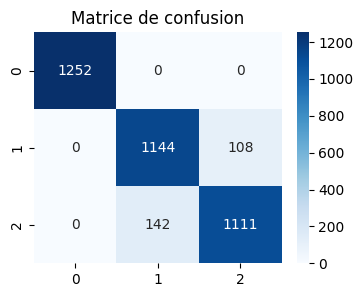

Average val confusion matrix


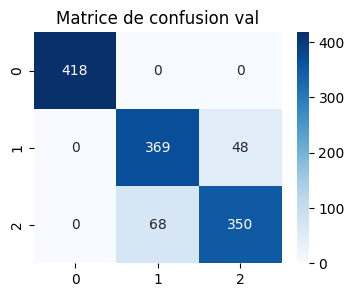

Fold 0:
Fold 0 accuracy : 0.9454351876497206, val accuracy :0.8946528332003192
Poids caractéristiques : [0.18596229 0.23236383 0.13778653 0.13942601 0.18825481 0.11620653]
Fold 1:
Fold 1 accuracy : 0.9393132818738356, val accuracy :0.9305666400638468
Poids caractéristiques : [0.16355558 0.20819021 0.11532399 0.21790134 0.16978032 0.12524857]
Fold 2:
Fold 2 accuracy : 0.9451836083022884, val accuracy :0.9193290734824281
Poids caractéristiques : [0.14474752 0.19948054 0.11727596 0.18489342 0.19792773 0.15567483]
Fold 3:
Fold 3 accuracy : 0.9457158062799361, val accuracy :0.9161341853035144
Poids caractéristiques : [0.15447965 0.23877002 0.1304346  0.13132456 0.21158154 0.13340962]
-------------------
Train accuracy : 0.9439119710264452
Val accuracy : 0.9151706830125271
Average feature weights [0.162186261872173, 0.219701150509208, 0.1252052687986234, 0.16838633173479095, 0.19188609777769397, 0.13263488930751074]


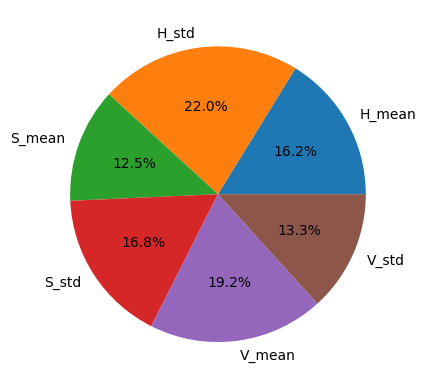

Average confusion matrix


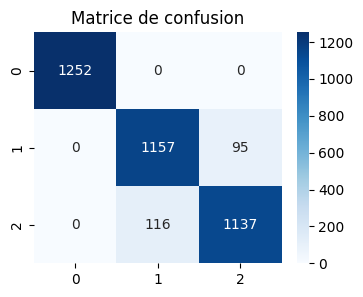

Average val confusion matrix


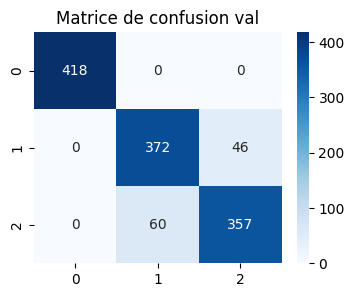

Fold 0:
Fold 0 accuracy : 0.9608730369976045, val accuracy :0.9201915403032721
Poids caractéristiques : [0.18329739 0.22783913 0.14497636 0.13802587 0.18487545 0.1209858 ]
Fold 1:
Fold 1 accuracy : 0.9558158104870907, val accuracy :0.9385474860335196
Poids caractéristiques : [0.16064024 0.2047974  0.11996471 0.21756002 0.16947739 0.12756025]
Fold 2:
Fold 2 accuracy : 0.9587546567323044, val accuracy :0.9305111821086262
Poids caractéristiques : [0.14570662 0.19814594 0.12708585 0.17676125 0.19360829 0.15869204]
Fold 3:
Fold 3 accuracy : 0.9606173496540713, val accuracy :0.9249201277955271
Poids caractéristiques : [0.15656721 0.22982587 0.13733747 0.13558193 0.20594006 0.13474747]
-------------------
Train accuracy : 0.9590152134677676
Val accuracy : 0.9285425840602363
Average feature weights [0.16155286563898902, 0.2151520850300423, 0.13234109812672606, 0.16698226686179185, 0.18847529683512812, 0.13549638750732274]


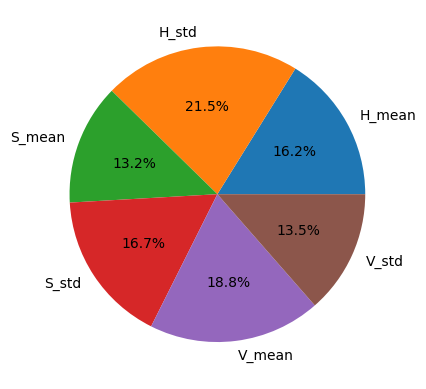

Average confusion matrix


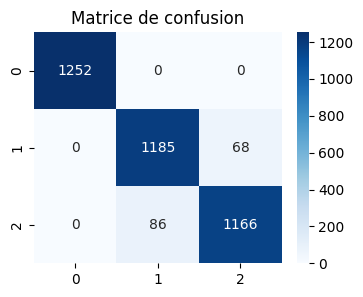

Average val confusion matrix


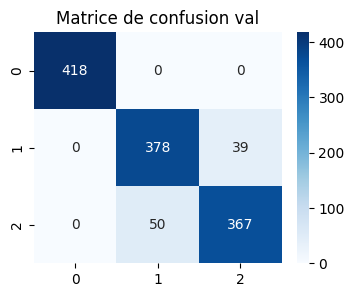

Fold 0:
Fold 0 accuracy : 0.6664892201224382, val accuracy :0.6671987230646449
Poids caractéristiques : [0.15333333 0.26666667 0.18666667 0.04       0.2        0.15333333]
Fold 1:
Fold 1 accuracy : 0.6664892201224382, val accuracy :0.6671987230646449
Poids caractéristiques : [0.12       0.22       0.14666667 0.18666667 0.19333333 0.13333333]
Fold 2:
Fold 2 accuracy : 0.6668440659925492, val accuracy :0.6661341853035144
Poids caractéristiques : [0.14666667 0.22666667 0.15333333 0.12       0.20666667 0.14666667]
Fold 3:
Fold 3 accuracy : 0.6668440659925492, val accuracy :0.6661341853035144
Poids caractéristiques : [0.15333333 0.27333333 0.18       0.02666667 0.20666667 0.16      ]
-------------------
Train accuracy : 0.6666666430574937
Val accuracy : 0.6666664541840797
Average feature weights [0.1433333333333333, 0.24666666666666667, 0.16666666666666669, 0.09333333333333334, 0.20166666666666666, 0.14833333333333332]


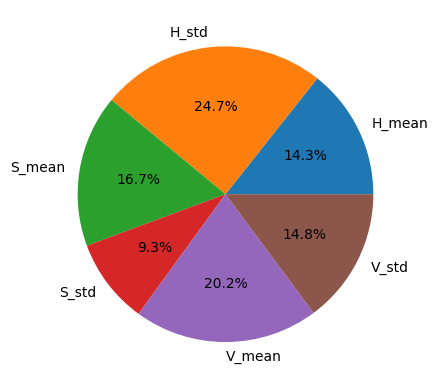

Average confusion matrix


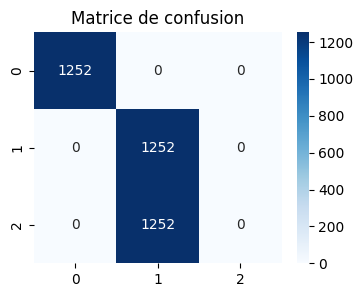

Average val confusion matrix


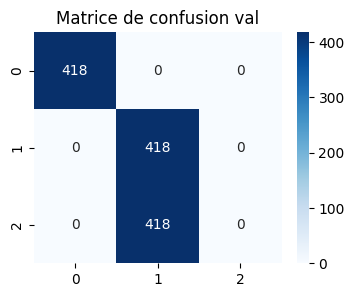

Fold 0:
Fold 0 accuracy : 0.9020495075858398, val accuracy :0.8778930566640064
Poids caractéristiques : [0.16979472 0.26689356 0.1456741  0.1082114  0.17829331 0.13113291]
Fold 1:
Fold 1 accuracy : 0.889273356401384, val accuracy :0.902633679169992
Poids caractéristiques : [0.1425624  0.225582   0.1128274  0.21783105 0.16698844 0.1342087 ]
Fold 2:
Fold 2 accuracy : 0.8879723257051623, val accuracy :0.8234824281150159
Poids caractéristiques : [0.12400307 0.21719923 0.11254765 0.17557244 0.19903398 0.17164364]
Fold 3:
Fold 3 accuracy : 0.8847791378392762, val accuracy :0.829073482428115
Poids caractéristiques : [0.14322816 0.27940573 0.13231377 0.10361206 0.20038621 0.14105407]
-------------------
Train accuracy : 0.8910185818829155
Val accuracy : 0.8582706615942823
Average feature weights [0.14489708761284695, 0.24727012867182163, 0.12584072965534643, 0.15130673846402168, 0.18617548525861874, 0.14450983033734463]


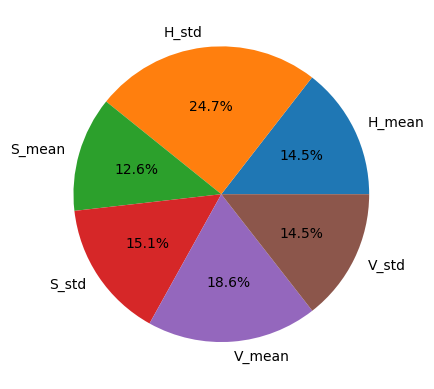

Average confusion matrix


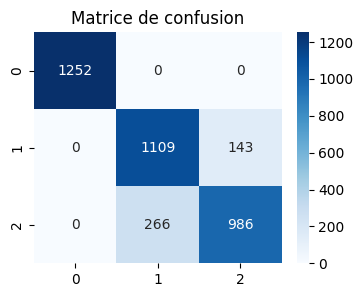

Average val confusion matrix


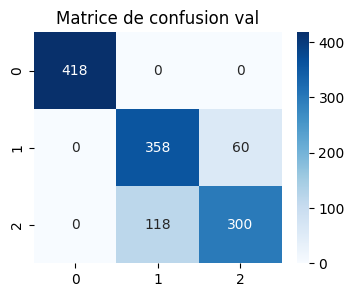

Fold 0:
Fold 0 accuracy : 0.9236092627096087, val accuracy :0.8723064644852354
Poids caractéristiques : [0.17676405 0.2588298  0.13461723 0.13365366 0.17022348 0.12591178]
Fold 1:
Fold 1 accuracy : 0.9153579984029812, val accuracy :0.9201915403032721
Poids caractéristiques : [0.15889613 0.22706266 0.10477111 0.22064278 0.15850545 0.13012186]
Fold 2:
Fold 2 accuracy : 0.9042043640234168, val accuracy :0.8690095846645367
Poids caractéristiques : [0.14179158 0.21680868 0.1043152  0.18443352 0.18807808 0.16457295]
Fold 3:
Fold 3 accuracy : 0.9212346993081426, val accuracy :0.8817891373801917
Poids caractéristiques : [0.15526505 0.2691881  0.12494651 0.12246549 0.19064388 0.13749097]
-------------------
Train accuracy : 0.9161015811110373
Val accuracy : 0.8858241817083089
Average feature weights [0.1581792021722915, 0.24297230739599124, 0.1171625127253321, 0.1652988635259384, 0.17686272433459116, 0.13952438984585558]


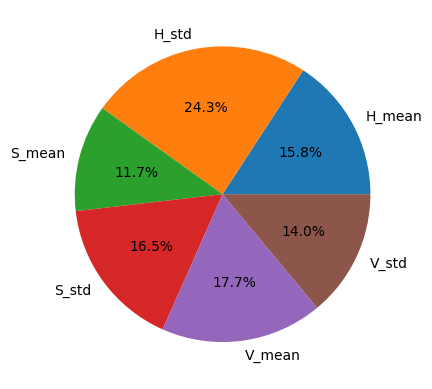

Average confusion matrix


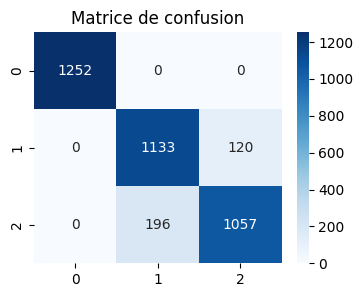

Average val confusion matrix


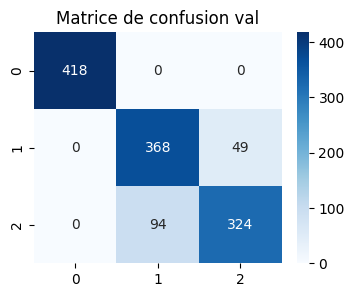

Fold 0:
Fold 0 accuracy : 0.9377162629757786, val accuracy :0.8842777334397446
Poids caractéristiques : [0.18329975 0.24421147 0.13167682 0.14861092 0.16568542 0.12651561]
Fold 1:
Fold 1 accuracy : 0.9257386212403513, val accuracy :0.9249800478850758
Poids caractéristiques : [0.16504812 0.21878486 0.10522521 0.22343367 0.15488374 0.13262441]
Fold 2:
Fold 2 accuracy : 0.9342735497605109, val accuracy :0.9113418530351438
Poids caractéristiques : [0.146464   0.20651012 0.1074118  0.19621084 0.17953236 0.16387089]
Fold 3:
Fold 3 accuracy : 0.932410856838744, val accuracy :0.902555910543131
Poids caractéristiques : [0.15860592 0.25788011 0.12425347 0.1308805  0.18540329 0.1429767 ]
-------------------
Train accuracy : 0.9325348227038462
Val accuracy : 0.9057888862257739
Average feature weights [0.1633544472359535, 0.23184664238076896, 0.11714182473188532, 0.17478398081097518, 0.17137620235487427, 0.14149690248554267]


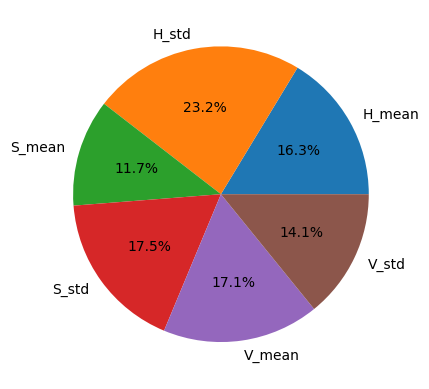

Average confusion matrix


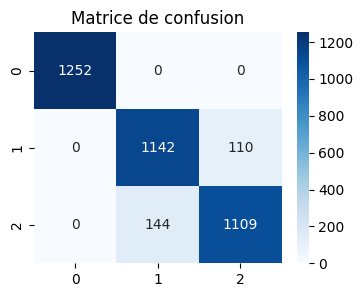

Average val confusion matrix


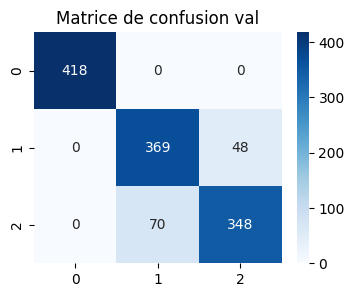

Fold 0:
Fold 0 accuracy : 0.9454351876497206, val accuracy :0.8954509177972865
Poids caractéristiques : [0.18454388 0.2383054  0.13738791 0.15407897 0.16247686 0.12320698]
Fold 1:
Fold 1 accuracy : 0.9395794516901783, val accuracy :0.9321628092577813
Poids caractéristiques : [0.16608612 0.21365883 0.11299644 0.22416162 0.15307027 0.13002672]
Fold 2:
Fold 2 accuracy : 0.94598190526876, val accuracy :0.920926517571885
Poids caractéristiques : [0.14513896 0.20393434 0.11488522 0.19910677 0.17625957 0.16067514]
Fold 3:
Fold 3 accuracy : 0.9465141032464076, val accuracy :0.9145367412140575
Poids caractéristiques : [0.15912643 0.25263094 0.13102636 0.13339057 0.18466332 0.13916238]
-------------------
Train accuracy : 0.9443776619637666
Val accuracy : 0.9157692464602525
Average feature weights [0.16372384521551714, 0.2271323770906025, 0.12407398112664278, 0.1776844833784148, 0.16911750610271012, 0.13826780708611275]


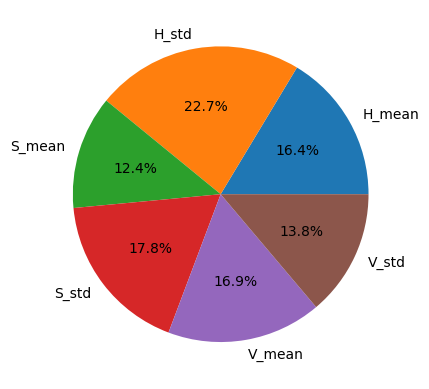

Average confusion matrix


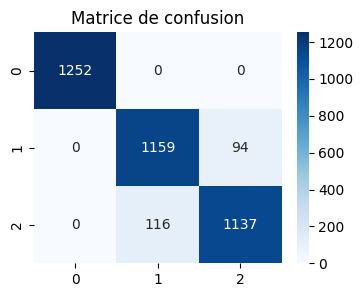

Average val confusion matrix


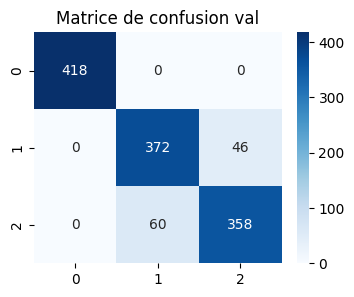

Fold 0:
Fold 0 accuracy : 0.9571466595688048, val accuracy :0.9154030327214685
Poids caractéristiques : [0.18413119 0.23392013 0.14086557 0.15446004 0.15943102 0.12719206]
Fold 1:
Fold 1 accuracy : 0.9576789992014906, val accuracy :0.9393455706304868
Poids caractéristiques : [0.16394021 0.20873529 0.11953403 0.22703436 0.14967131 0.1310848 ]
Fold 2:
Fold 2 accuracy : 0.9616817456093667, val accuracy :0.9305111821086262
Poids caractéristiques : [0.14465588 0.20139177 0.12569396 0.19565393 0.17218917 0.16041528]
Fold 3:
Fold 3 accuracy : 0.9616817456093667, val accuracy :0.9257188498402555
Poids caractéristiques : [0.15988337 0.24267086 0.13978627 0.13815684 0.18211454 0.13738812]
-------------------
Train accuracy : 0.9595472874972573
Val accuracy : 0.9277446588252092
Average feature weights [0.1631526628264086, 0.22167951256180246, 0.1314699585086061, 0.17882629401466588, 0.16585150837405832, 0.13902006371445869]


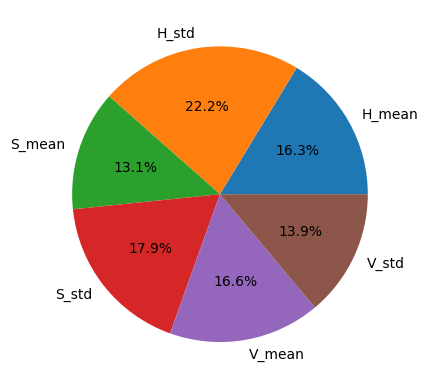

Average confusion matrix


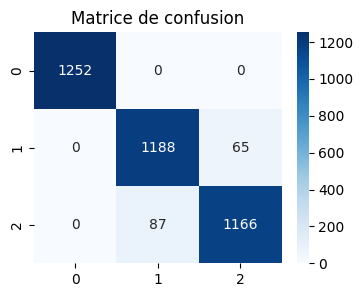

Average val confusion matrix


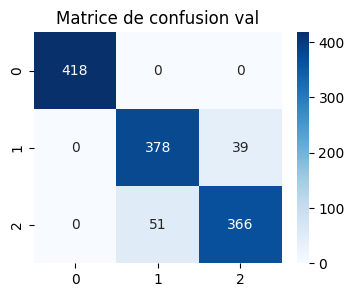

Fold 0:
Fold 0 accuracy : 0.6664892201224382, val accuracy :0.6671987230646449
Poids caractéristiques : [0.165 0.24  0.18  0.05  0.2   0.165]
Fold 1:
Fold 1 accuracy : 0.6664892201224382, val accuracy :0.6671987230646449
Poids caractéristiques : [0.13  0.19  0.14  0.205 0.185 0.15 ]
Fold 2:
Fold 2 accuracy : 0.6668440659925492, val accuracy :0.6661341853035144
Poids caractéristiques : [0.155 0.205 0.155 0.125 0.2   0.16 ]
Fold 3:
Fold 3 accuracy : 0.6668440659925492, val accuracy :0.6661341853035144
Poids caractéristiques : [0.16  0.24  0.185 0.035 0.21  0.17 ]
-------------------
Train accuracy : 0.6666666430574937
Val accuracy : 0.6666664541840797
Average feature weights [0.15250000000000002, 0.21875, 0.16499999999999998, 0.10375000000000001, 0.19874999999999998, 0.16125]


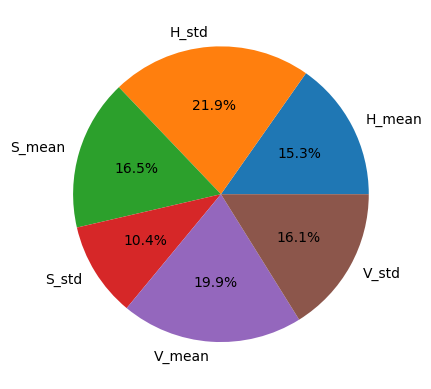

Average confusion matrix


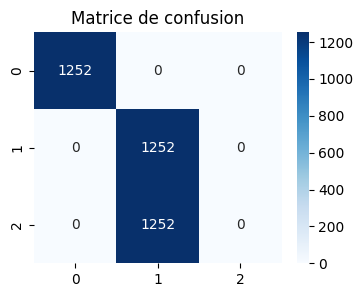

Average val confusion matrix


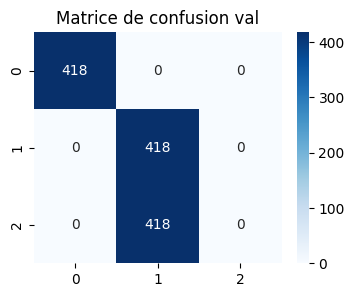

Fold 0:
Fold 0 accuracy : 0.88794250731967, val accuracy :0.897047086991221
Poids caractéristiques : [0.17660267 0.25208339 0.139543   0.11435881 0.1809741  0.13643802]
Fold 1:
Fold 1 accuracy : 0.890870375299441, val accuracy :0.9273743016759777
Poids caractéristiques : [0.14866061 0.20764306 0.10711197 0.23127441 0.15979423 0.14551572]
Fold 2:
Fold 2 accuracy : 0.8877062267163385, val accuracy :0.8258785942492013
Poids caractéristiques : [0.12997043 0.20370046 0.11338359 0.1782013  0.19089513 0.1838491 ]
Fold 3:
Fold 3 accuracy : 0.8845130388504524, val accuracy :0.8306709265175719
Poids caractéristiques : [0.15066731 0.25770737 0.13668056 0.10833789 0.20190622 0.14470064]
-------------------
Train accuracy : 0.8877580370464754
Val accuracy : 0.8702427273584931
Average feature weights [0.15147525431485578, 0.2302835677763912, 0.12417978150390423, 0.15804310436042598, 0.18339242154377414, 0.15262587050064874]


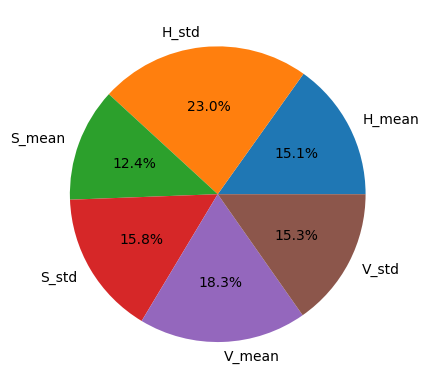

Average confusion matrix


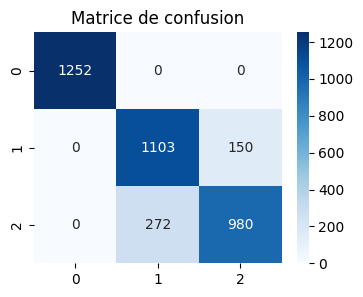

Average val confusion matrix


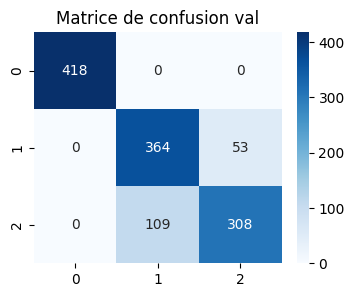

Fold 0:
Fold 0 accuracy : 0.9254724514240085, val accuracy :0.86512370311253
Poids caractéristiques : [0.1831752  0.2413011  0.12917703 0.1428249  0.17151236 0.1320094 ]
Fold 1:
Fold 1 accuracy : 0.916955017301038, val accuracy :0.9217877094972067
Poids caractéristiques : [0.16389951 0.20782473 0.10000638 0.23395003 0.15204658 0.14227277]
Fold 2:
Fold 2 accuracy : 0.903672166045769, val accuracy :0.8666134185303515
Poids caractéristiques : [0.14834432 0.20114029 0.10480401 0.18985661 0.18088623 0.17496854]
Fold 3:
Fold 3 accuracy : 0.9199042043640234, val accuracy :0.8833865814696485
Poids caractéristiques : [0.16079446 0.24690053 0.12835261 0.12991209 0.1927517  0.14128862]
-------------------
Train accuracy : 0.9165009597837097
Val accuracy : 0.8842278531524341
Average feature weights [0.16405337315182808, 0.22429166322192698, 0.11558500755343484, 0.17413590626175063, 0.17429921763887787, 0.14763483217218168]


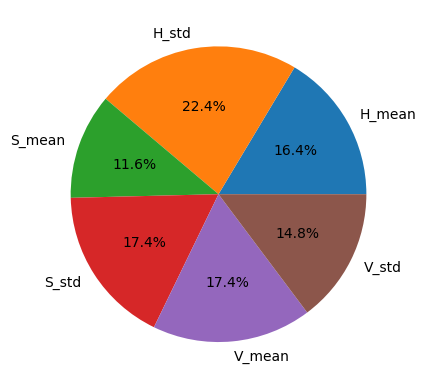

Average confusion matrix


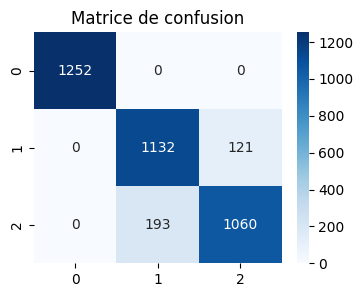

Average val confusion matrix


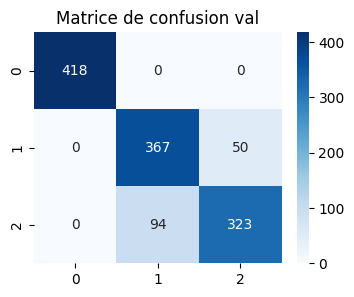

Fold 0:
Fold 0 accuracy : 0.9374500931594357, val accuracy :0.8850758180367119
Poids caractéristiques : [0.19019854 0.23103608 0.12766744 0.15214645 0.16726138 0.1316901 ]
Fold 1:
Fold 1 accuracy : 0.9249401117913228, val accuracy :0.9249800478850758
Poids caractéristiques : [0.17002399 0.20217259 0.10128341 0.23455674 0.14926051 0.14270276]
Fold 2:
Fold 2 accuracy : 0.9334752527940394, val accuracy :0.9113418530351438
Poids caractéristiques : [0.15341826 0.19381605 0.10839798 0.19746336 0.17329398 0.17361037]
Fold 3:
Fold 3 accuracy : 0.9318786588610963, val accuracy :0.902555910543131
Poids caractéristiques : [0.16596889 0.23772541 0.12845939 0.13402461 0.18822851 0.14559319]
-------------------
Train accuracy : 0.9319360291514736
Val accuracy : 0.9059884073750157
Average feature weights [0.16990242228420166, 0.21618753377021732, 0.1164520555474525, 0.1795477879391817, 0.1695110952232475, 0.14839910523569932]


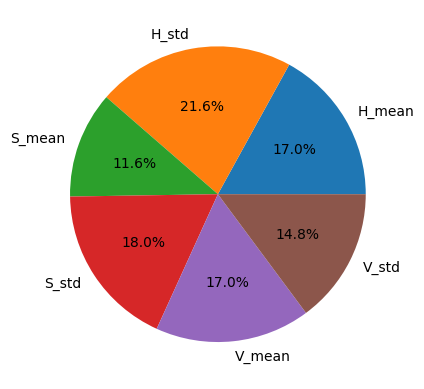

Average confusion matrix


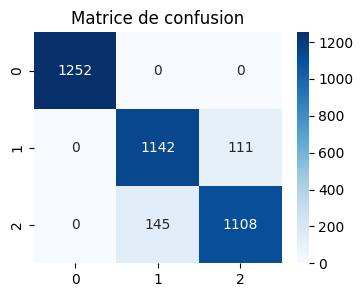

Average val confusion matrix


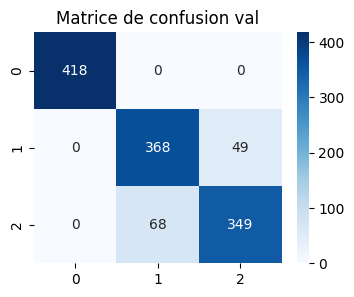

Fold 0:
Fold 0 accuracy : 0.9459675272824062, val accuracy :0.8946528332003192
Poids caractéristiques : [0.19247525 0.22426401 0.13343367 0.15744482 0.1645554  0.12782686]
Fold 1:
Fold 1 accuracy : 0.9374500931594357, val accuracy :0.9329608938547486
Poids caractéristiques : [0.17063901 0.19656465 0.10905874 0.23699303 0.14611933 0.14062524]
Fold 2:
Fold 2 accuracy : 0.9465141032464076, val accuracy :0.9177316293929713
Poids caractéristiques : [0.1510779  0.19196828 0.11670935 0.20021089 0.1699084  0.17012518]
Fold 3:
Fold 3 accuracy : 0.9457158062799361, val accuracy :0.9153354632587859
Poids caractéristiques : [0.1639451  0.23364868 0.13585939 0.13764187 0.18553489 0.14337008]
-------------------
Train accuracy : 0.9439118824920464
Val accuracy : 0.9151702049267062
Average feature weights [0.16953431286835766, 0.21161140528979927, 0.12376528675229356, 0.18307264995459804, 0.16652950598311503, 0.1454868391518364]


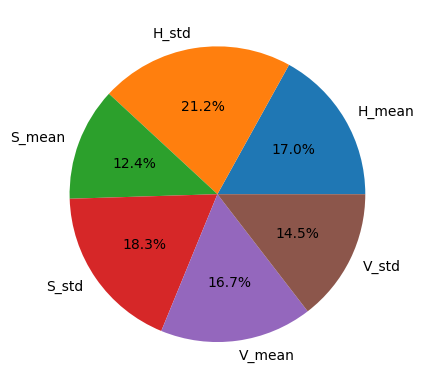

Average confusion matrix


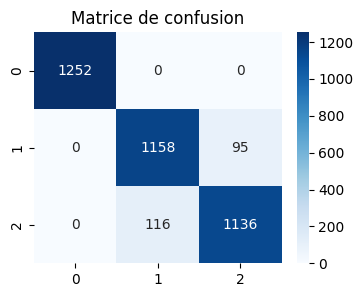

Average val confusion matrix


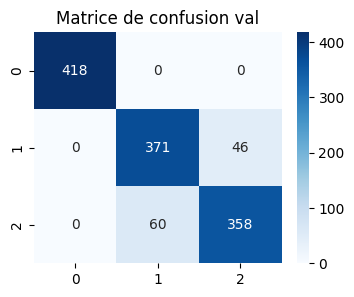

Fold 0:
Fold 0 accuracy : 0.9563481501197764, val accuracy :0.9162011173184358
Poids caractéristiques : [0.19070466 0.2203084  0.13760649 0.15827239 0.16098419 0.13212387]
Fold 1:
Fold 1 accuracy : 0.9582113388341762, val accuracy :0.9393455706304868
Poids caractéristiques : [0.16764969 0.19303324 0.1165658  0.23666033 0.14501757 0.14107337]
Fold 2:
Fold 2 accuracy : 0.9635444385311336, val accuracy :0.9297124600638977
Poids caractéristiques : [0.15154412 0.18798479 0.12623547 0.19868316 0.16608582 0.16946665]
Fold 3:
Fold 3 accuracy : 0.961149547631719, val accuracy :0.9249201277955271
Poids caractéristiques : [0.16541514 0.22510396 0.14342554 0.14059582 0.18452729 0.14093225]
-------------------
Train accuracy : 0.9598133687792013
Val accuracy : 0.927544818952087
Average feature weights [0.16882839970487878, 0.2066075958520286, 0.1309583243124523, 0.18355292376784124, 0.16415371750572388, 0.14589903885707517]


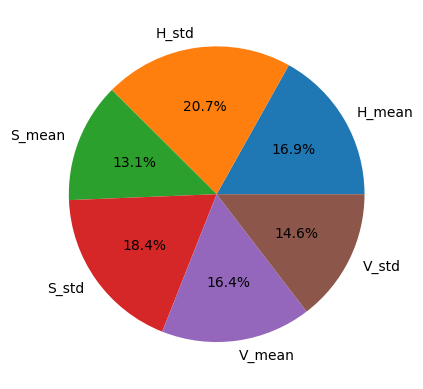

Average confusion matrix


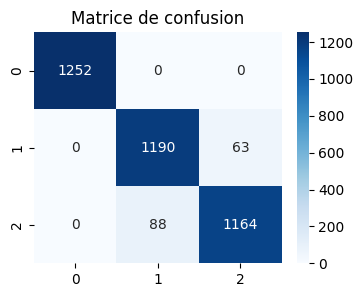

Average val confusion matrix


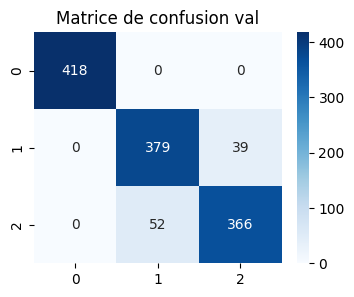

Fold 0:
Fold 0 accuracy : 0.6664892201224382, val accuracy :0.6671987230646449
Poids caractéristiques : [0.184 0.232 0.18  0.044 0.18  0.18 ]
Fold 1:
Fold 1 accuracy : 0.6664892201224382, val accuracy :0.6671987230646449
Poids caractéristiques : [0.148 0.184 0.144 0.196 0.164 0.164]
Fold 2:
Fold 2 accuracy : 0.6668440659925492, val accuracy :0.6661341853035144
Poids caractéristiques : [0.172 0.196 0.156 0.116 0.184 0.176]
Fold 3:
Fold 3 accuracy : 0.6668440659925492, val accuracy :0.6661341853035144
Poids caractéristiques : [0.18  0.228 0.184 0.032 0.192 0.184]
-------------------
Train accuracy : 0.6666666430574937
Val accuracy : 0.6666664541840797
Average feature weights [0.17099999999999999, 0.21000000000000002, 0.16599999999999998, 0.097, 0.18, 0.176]


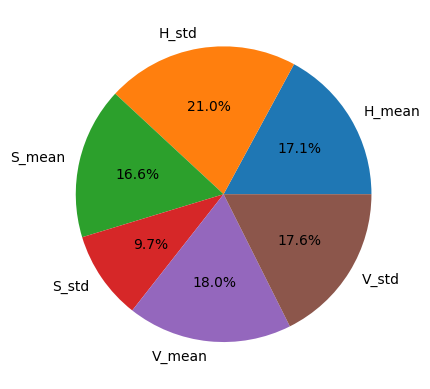

Average confusion matrix


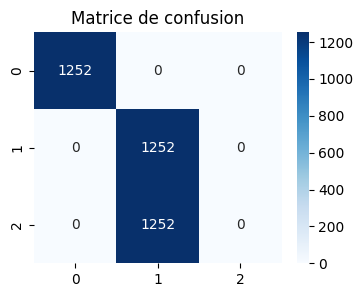

Average val confusion matrix


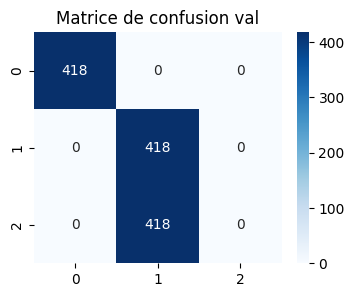

Fold 0:
Fold 0 accuracy : 0.8884748469523556, val accuracy :0.8954509177972865
Poids caractéristiques : [0.19142787 0.24495732 0.13815267 0.11238009 0.16686992 0.14621213]
Fold 1:
Fold 1 accuracy : 0.8906042054830983, val accuracy :0.9265762170790104
Poids caractéristiques : [0.16346087 0.20223553 0.11000249 0.22673311 0.14312559 0.1544424 ]
Fold 2:
Fold 2 accuracy : 0.8877062267163385, val accuracy :0.8266773162939297
Poids caractéristiques : [0.14225545 0.19672309 0.11441164 0.17386128 0.18177505 0.19097349]
Fold 3:
Fold 3 accuracy : 0.8842469398616285, val accuracy :0.8306709265175719
Poids caractéristiques : [0.16504099 0.24922018 0.13558904 0.10860193 0.18854076 0.1530071 ]
-------------------
Train accuracy : 0.8877580547533552
Val accuracy : 0.8698438444219496
Average feature weights [0.16554629433761167, 0.2232840298699677, 0.12453896277059351, 0.15539410363438327, 0.17007782980442848, 0.1611587795830154]


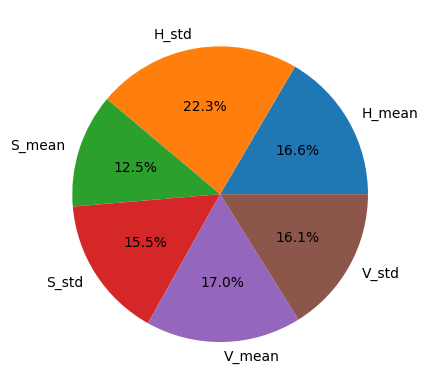

Average confusion matrix


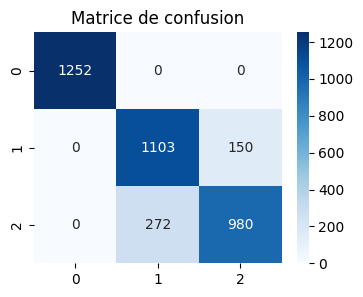

Average val confusion matrix


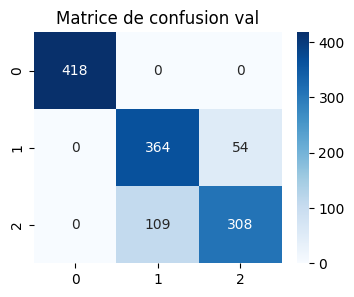

Fold 0:
Fold 0 accuracy : 0.9260047910566942, val accuracy :0.86512370311253
Poids caractéristiques : [0.19634939 0.23357315 0.12779343 0.14308074 0.15733341 0.14186988]
Fold 1:
Fold 1 accuracy : 0.9153579984029812, val accuracy :0.922585794094174
Poids caractéristiques : [0.17708767 0.20175867 0.10253099 0.23193752 0.13630091 0.15038425]
Fold 2:
Fold 2 accuracy : 0.9042043640234168, val accuracy :0.8642172523961661
Poids caractéristiques : [0.15894793 0.19500781 0.10559878 0.18773007 0.17123223 0.18148319]
Fold 3:
Fold 3 accuracy : 0.9204364023416711, val accuracy :0.8833865814696485
Poids caractéristiques : [0.17267027 0.23908374 0.12773585 0.13147771 0.17959366 0.14943877]
-------------------
Train accuracy : 0.9165008889561909
Val accuracy : 0.8838283327681297
Average feature weights [0.17626381681812908, 0.21735584187397888, 0.11591476022576644, 0.17355651105203093, 0.16111504986881175, 0.15579402016128296]


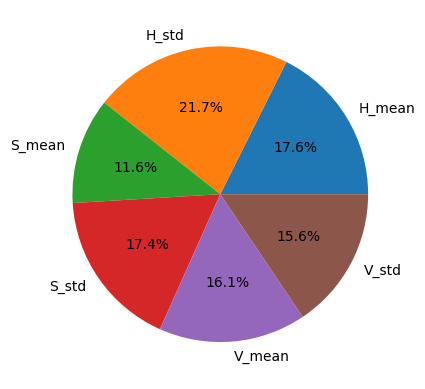

Average confusion matrix


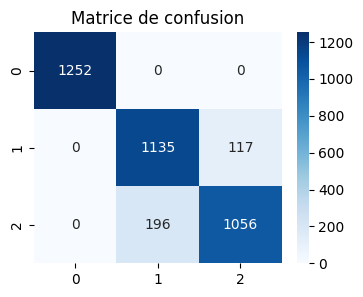

Average val confusion matrix


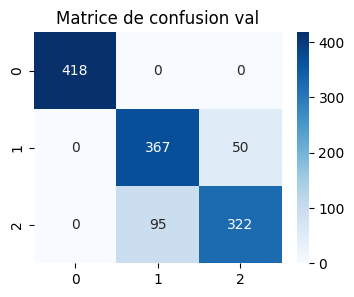

Fold 0:
Fold 0 accuracy : 0.9366515837104072, val accuracy :0.8850758180367119
Poids caractéristiques : [0.20312485 0.22453306 0.12665712 0.15088592 0.15508675 0.13971229]
Fold 1:
Fold 1 accuracy : 0.9257386212403513, val accuracy :0.9257781324820431
Poids caractéristiques : [0.18191203 0.19640872 0.10377669 0.23285549 0.13501738 0.15002969]
Fold 2:
Fold 2 accuracy : 0.9337413517828632, val accuracy :0.9113418530351438
Poids caractéristiques : [0.16210276 0.1887868  0.10996794 0.19429791 0.16552574 0.17931885]
Fold 3:
Fold 3 accuracy : 0.9329430548163917, val accuracy :0.9009584664536742
Poids caractéristiques : [0.17768475 0.23018608 0.12758983 0.13489431 0.1771065  0.15253853]
-------------------
Train accuracy : 0.9322686528875034
Val accuracy : 0.9057885675018933
Average feature weights [0.18120609862040876, 0.20997866521842729, 0.11699789279649278, 0.17823340785981942, 0.1581840945742868, 0.1553998409305649]


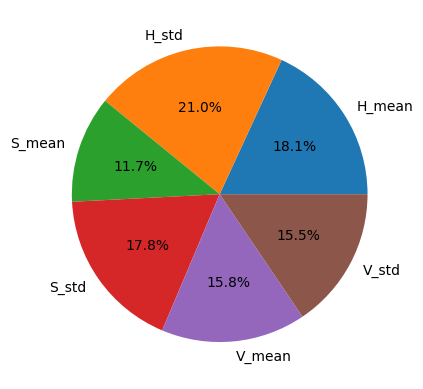

Average confusion matrix


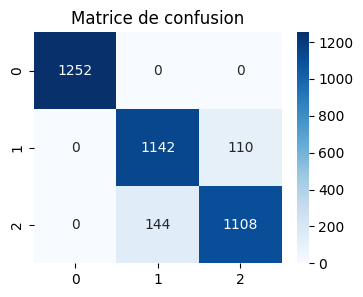

Average val confusion matrix


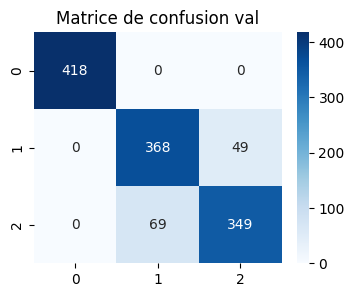

Fold 0:
Fold 0 accuracy : 0.9441043385680064, val accuracy :0.8946528332003192
Poids caractéristiques : [0.20356586 0.21889526 0.13158139 0.15691149 0.1530033  0.1360427 ]
Fold 1:
Fold 1 accuracy : 0.9369177535267501, val accuracy :0.9329608938547486
Poids caractéristiques : [0.1818914  0.19183075 0.11081392 0.23448039 0.13250032 0.14848322]
Fold 2:
Fold 2 accuracy : 0.947578499201703, val accuracy :0.9185303514376997
Poids caractéristiques : [0.16022919 0.18616339 0.11736327 0.19776262 0.16205933 0.1764222 ]
Fold 3:
Fold 3 accuracy : 0.9457158062799361, val accuracy :0.9137380191693291
Poids caractéristiques : [0.17577617 0.22605274 0.13469017 0.13887916 0.17442254 0.15017922]
-------------------
Train accuracy : 0.9435790993940989
Val accuracy : 0.9149705244155241
Average feature weights [0.18036565434629012, 0.2057355359848277, 0.12361218915816545, 0.18200841653700092, 0.155496370481003, 0.15278183349271285]


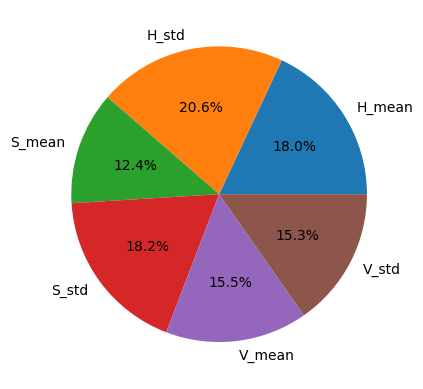

Average confusion matrix


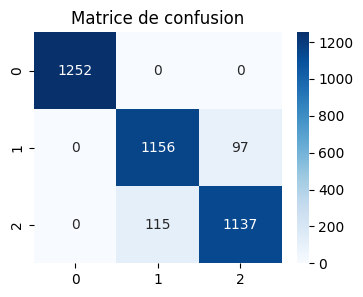

Average val confusion matrix


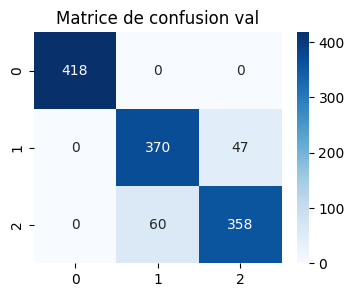

Fold 0:
Fold 0 accuracy : 0.9571466595688048, val accuracy :0.9130087789305666
Poids caractéristiques : [0.20407114 0.21298989 0.13661001 0.15657292 0.14986543 0.13989061]
Fold 1:
Fold 1 accuracy : 0.9576789992014906, val accuracy :0.9385474860335196
Poids caractéristiques : [0.1787667  0.18745413 0.11912251 0.23526161 0.13119922 0.14819583]
Fold 2:
Fold 2 accuracy : 0.9630122405534859, val accuracy :0.9305111821086262
Poids caractéristiques : [0.1592059  0.18399476 0.12693377 0.19605384 0.15870738 0.17510436]
Fold 3:
Fold 3 accuracy : 0.961149547631719, val accuracy :0.9249201277955271
Poids caractéristiques : [0.17678108 0.21829773 0.14247304 0.14086237 0.17377169 0.14781409]
-------------------
Train accuracy : 0.959746861738875
Val accuracy : 0.9267468937170599
Average feature weights [0.17970620591326827, 0.20068412779613348, 0.13128483294210797, 0.18218768525860243, 0.1533859285232225, 0.15275121956666537]


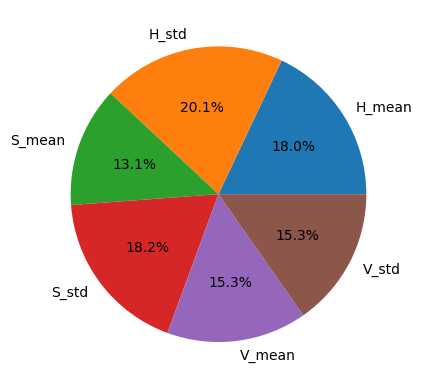

Average confusion matrix


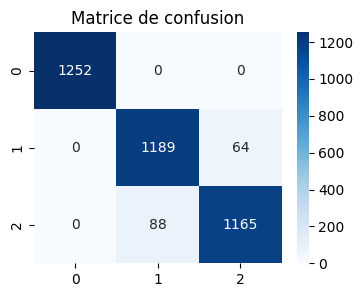

Average val confusion matrix


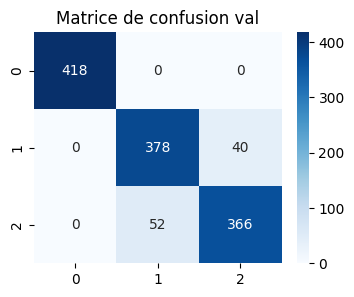

Fold 0:
Fold 0 accuracy : 0.6664892201224382, val accuracy :0.6671987230646449
Poids caractéristiques : [0.17       0.23666667 0.19333333 0.04       0.18666667 0.17333333]
Fold 1:
Fold 1 accuracy : 0.6664892201224382, val accuracy :0.6671987230646449
Poids caractéristiques : [0.13333333 0.18666667 0.16       0.19666667 0.17333333 0.15      ]
Fold 2:
Fold 2 accuracy : 0.6668440659925492, val accuracy :0.6661341853035144
Poids caractéristiques : [0.16       0.2        0.17333333 0.10666667 0.19       0.17      ]
Fold 3:
Fold 3 accuracy : 0.6668440659925492, val accuracy :0.6661341853035144
Poids caractéristiques : [0.16666667 0.22666667 0.19666667 0.03666667 0.19666667 0.17666667]
-------------------
Train accuracy : 0.6666666430574937
Val accuracy : 0.6666664541840797
Average feature weights [0.15750000000000003, 0.2125, 0.18083333333333332, 0.095, 0.18666666666666668, 0.16750000000000004]


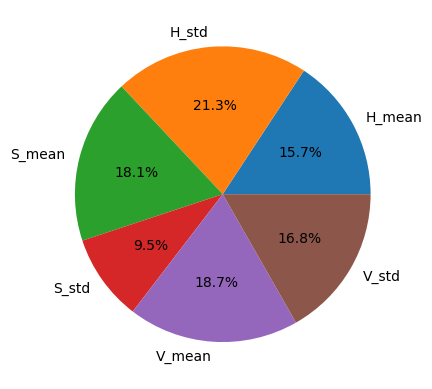

Average confusion matrix


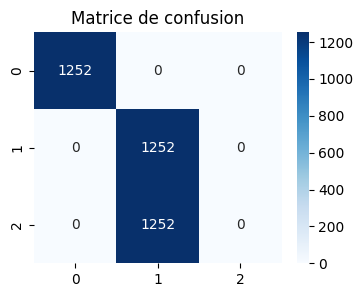

Average val confusion matrix


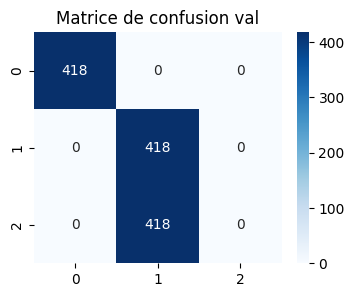

Fold 0:
Fold 0 accuracy : 0.9023156774021825, val accuracy :0.8778930566640064
Poids caractéristiques : [0.17916695 0.24338287 0.1476731  0.11861864 0.17080744 0.140351  ]
Fold 1:
Fold 1 accuracy : 0.8828852808091563, val accuracy :0.8842777334397446
Poids caractéristiques : [0.14998413 0.19979852 0.12213712 0.23617865 0.15046937 0.14143222]
Fold 2:
Fold 2 accuracy : 0.8879723257051623, val accuracy :0.8266773162939297
Poids caractéristiques : [0.13292799 0.19598539 0.12677936 0.1770047  0.1857743  0.18152826]
Fold 3:
Fold 3 accuracy : 0.8861096327833954, val accuracy :0.8314696485623003
Poids caractéristiques : [0.15384845 0.24361007 0.14434958 0.1218476  0.18974837 0.14659594]
-------------------
Train accuracy : 0.8898207291749741
Val accuracy : 0.8550794387399954
Average feature weights [0.15398188160462475, 0.2206942118464616, 0.13523479181870846, 0.16341239430079307, 0.1741998677979415, 0.15247685263147062]


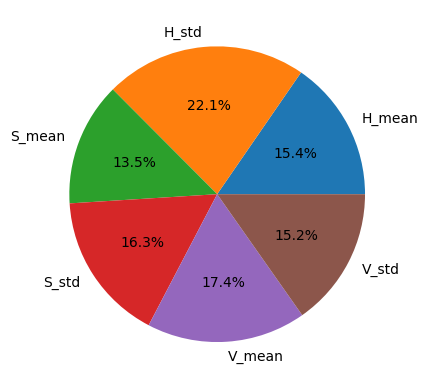

Average confusion matrix


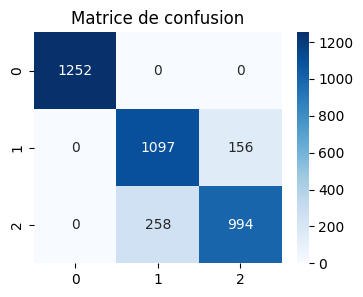

Average val confusion matrix


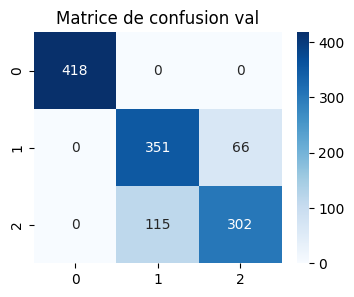

Fold 0:
Fold 0 accuracy : 0.9265371306893798, val accuracy :0.8659217877094972
Poids caractéristiques : [0.18588672 0.2327255  0.13722636 0.14749467 0.15918018 0.13748657]
Fold 1:
Fold 1 accuracy : 0.9161565078520095, val accuracy :0.922585794094174
Poids caractéristiques : [0.1656572  0.19968871 0.11387375 0.24028755 0.14126554 0.13922725]
Fold 2:
Fold 2 accuracy : 0.9065992549228313, val accuracy :0.8730031948881789
Poids caractéristiques : [0.15047871 0.19548966 0.11713366 0.18995471 0.17337891 0.17356434]
Fold 3:
Fold 3 accuracy : 0.9209686003193188, val accuracy :0.8833865814696485
Poids caractéristiques : [0.16285591 0.23505707 0.13622017 0.1427082  0.17896504 0.14419361]
-------------------
Train accuracy : 0.9175653734458848
Val accuracy : 0.8862243395403747
Average feature weights [0.1662196380300062, 0.21574023418621244, 0.1261134852087151, 0.18011128164413082, 0.1631974184552295, 0.148617942475706]


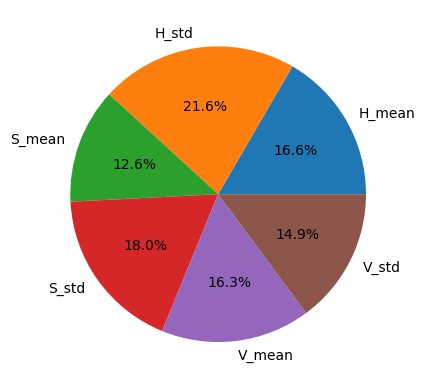

Average confusion matrix


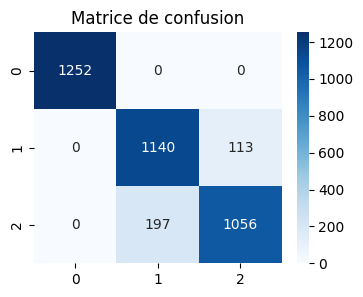

Average val confusion matrix


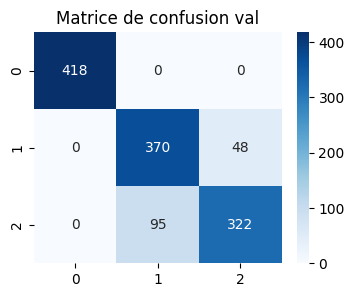

Fold 0:
Fold 0 accuracy : 0.9382486026084642, val accuracy :0.8858739026336792
Poids caractéristiques : [0.19388167 0.22313354 0.13569205 0.15638574 0.15688494 0.13402207]
Fold 1:
Fold 1 accuracy : 0.9254724514240085, val accuracy :0.9273743016759777
Poids caractéristiques : [0.17251099 0.19364221 0.11461018 0.24113498 0.13972286 0.13837878]
Fold 2:
Fold 2 accuracy : 0.9321447578499201, val accuracy :0.9113418530351438
Poids caractéristiques : [0.15431914 0.18881132 0.12068496 0.19727924 0.16838396 0.17052137]
Fold 3:
Fold 3 accuracy : 0.9332091538052155, val accuracy :0.9017571884984026
Poids caractéristiques : [0.16861724 0.22594114 0.13551694 0.14626438 0.17714243 0.14651787]
-------------------
Train accuracy : 0.9322687414219021
Val accuracy : 0.9065868114608009
Average feature weights [0.17233225995346574, 0.20788205327879053, 0.1266260324833968, 0.18526608537573946, 0.160533547671833, 0.1473600212367745]


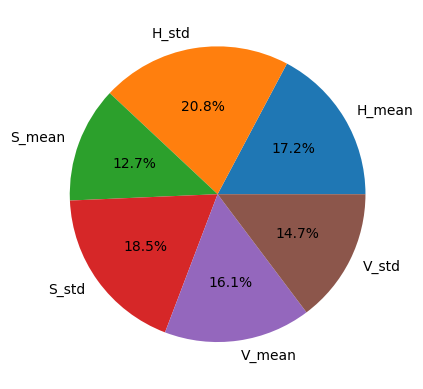

Average confusion matrix


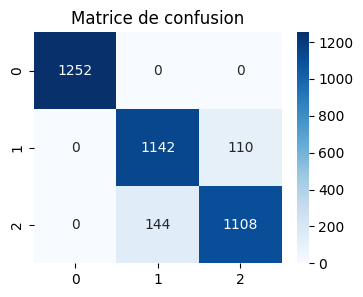

Average val confusion matrix


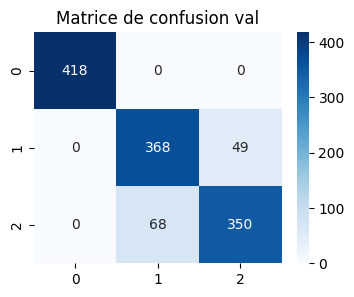

Fold 0:
Fold 0 accuracy : 0.9457013574660633, val accuracy :0.8962490023942538
Poids caractéristiques : [0.19383306 0.21816948 0.1406672  0.16153098 0.15468767 0.13111161]
Fold 1:
Fold 1 accuracy : 0.9382486026084642, val accuracy :0.9321628092577813
Poids caractéristiques : [0.17218683 0.18896124 0.12258793 0.24187199 0.13671807 0.13767395]
Fold 2:
Fold 2 accuracy : 0.9467802022352315, val accuracy :0.920926517571885
Poids caractéristiques : [0.15201164 0.18650094 0.12887016 0.19988525 0.1641362  0.1685958 ]
Fold 3:
Fold 3 accuracy : 0.9467802022352315, val accuracy :0.9153354632587859
Poids caractéristiques : [0.16647987 0.22187141 0.14325418 0.14985622 0.17360628 0.14493203]
-------------------
Train accuracy : 0.9443775911362476
Val accuracy : 0.9161684481206764
Average feature weights [0.17112785102716735, 0.20387576981151054, 0.13384486612287969, 0.18828611026066835, 0.1572870558205849, 0.1455783469571892]


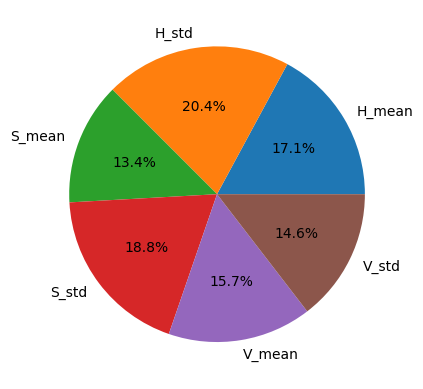

Average confusion matrix


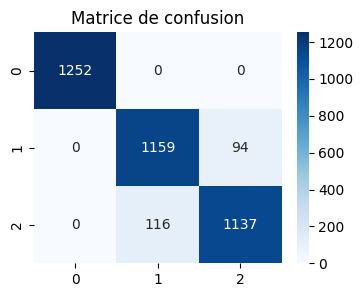

Average val confusion matrix


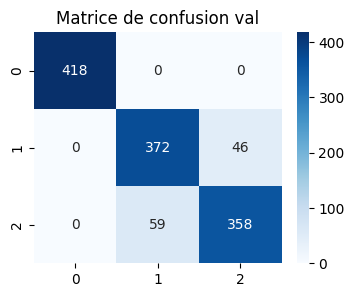

Fold 0:
Fold 0 accuracy : 0.9590098482832047, val accuracy :0.9217877094972067
Poids caractéristiques : [0.19582225 0.21147095 0.14538002 0.1614325  0.15236209 0.13353219]
Fold 1:
Fold 1 accuracy : 0.9584775086505191, val accuracy :0.9385474860335196
Poids caractéristiques : [0.16963824 0.18477673 0.1298984  0.24263876 0.13686968 0.13617819]
Fold 2:
Fold 2 accuracy : 0.9630122405534859, val accuracy :0.9313099041533547
Poids caractéristiques : [0.15338305 0.18291053 0.13746162 0.19805022 0.16188377 0.16631082]
Fold 3:
Fold 3 accuracy : 0.9619478445981905, val accuracy :0.9281150159744409
Poids caractéristiques : [0.16771085 0.21448374 0.15034258 0.15133766 0.17379956 0.1423256 ]
-------------------
Train accuracy : 0.9606118605213501
Val accuracy : 0.9299400289146305
Average feature weights [0.17163859640543733, 0.19841048986155296, 0.14077065612131717, 0.18836478308852322, 0.15622877482522934, 0.14458669969793994]


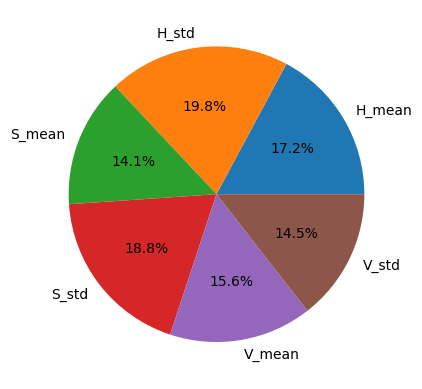

Average confusion matrix


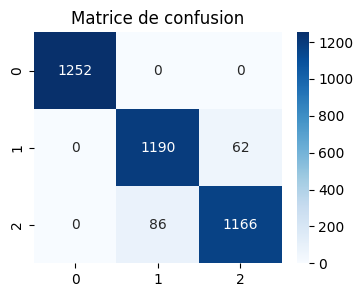

Average val confusion matrix


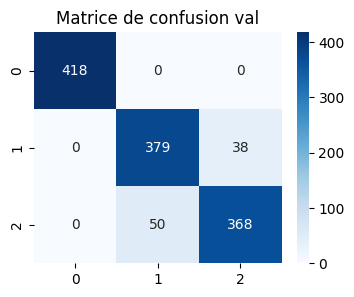

In [27]:
acc_train = []
acc_val = []
test_estimators = [50,100,150,200,250,300]

for nb_estimators in test_estimators:
    accuracies = []
    val_accuracies = []
    for max_depth in range(1,7):
        accuracy,val_accuracy,features_weights = eval_random_forest(X,y,nb_estimators,max_depth)
        accuracies.append(accuracy)
        val_accuracies.append(val_accuracy)
    acc_train.append(accuracies)
    acc_val.append(val_accuracies)


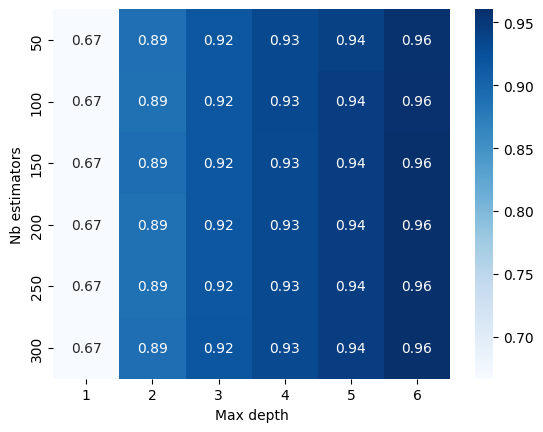

In [28]:
mat_acc_train = np.array(acc_train)
labels_x = range(1,7)
labels_y = test_estimators
sns.heatmap(mat_acc_train, annot=True, cmap="Blues", fmt='.2f', xticklabels=labels_x, yticklabels=labels_y)
plt.xlabel('Max depth')
plt.ylabel('Nb estimators')
plt.show()

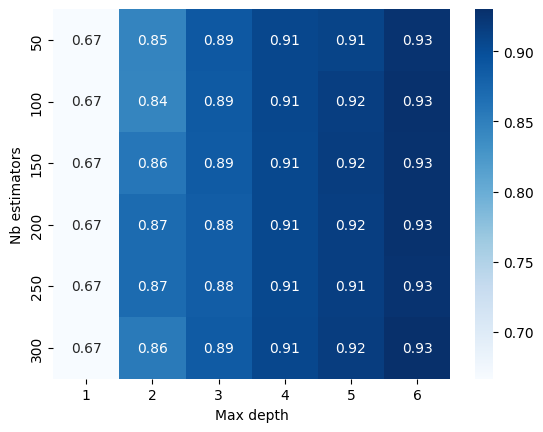

In [29]:
plt.clf()
mat_acc_val = np.array(acc_val)
labels_x = range(1,7)
labels_y = test_estimators
sns.heatmap(mat_acc_val, annot=True, cmap="Blues", fmt='.2f', xticklabels=labels_x, yticklabels=labels_y)
plt.xlabel('Max depth')
plt.ylabel('Nb estimators')
plt.show()